You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`.

### Description
In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images. To implement such kind of models, you should take a look at the following classes and methods: `Sequential model, Funcitonal API, MaxPooling2D, Conv2DTranspose`.


## Prepare dataset

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow.keras as keras
import tensorflow as tf
import skimage
import sklearn
from sklearn.model_selection import train_test_split
import pandas
%tensorflow_version 2.x
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download the Simpsons Characters dataset.
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3709      0 --:--:-- --:--:-- --:--:--  3709
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1104M    0 1104M    0     0  96.0M      0 --:--:--  0:00:11 --:--:--  103M


In [ ]:
# Download the Flowes Recognition dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3885      0 --:--:-- --:--:-- --:--:--  3885
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  224M    0  224M    0     0  69.6M      0 --:--:--  0:00:03 --:--:-- 90.5M


In [ ]:
# Extract the dataset
!unzip simpsons_dataset.zip

Archive:  simpsons_dataset.zip
replace annotation.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [ ]:
# Extract the dataset
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [ ]:
# Image loader function
def loadImages(path):
    '''Put files into lists and return them as one list with all images in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files

In [ ]:
# Selecting Homer Simpson pictures
data_dir = "simpsons_dataset/homer_simpson"
dataset = loadImages(data_dir)

In [ ]:
# Resize all image to be 64x64
imported_images = []
labels = []
for image_path in dataset:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))    
    imported_images.append(img)
    labels.append("Homer Simpson")

In [ ]:
# Converting the images into tensors
imported_images = np.array(imported_images)
labels = np.array(labels).reshape(len(labels), 1)
print (imported_images.shape)
print (labels.shape)

(2246, 64, 64, 3)
(2246, 1)


In [ ]:
# Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
x_train, x_test, y_train, y_test = train_test_split(imported_images, labels, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

dataset size:  2246
train size:  1347
test size:  450
val size:  449
train_y size:  1347
test_y size:  450
val_y size:  449


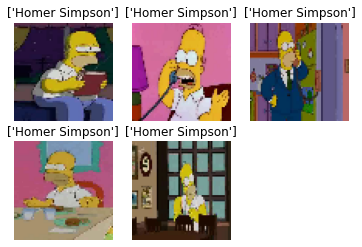

In [ ]:
# Print the size of each set and plot 5 training images and their corresponding masks.
print('dataset size: ', len(imported_images))
print('train size: ', len(x_train))
print('test size: ', len(x_test))
print('val size: ', len(x_val))
print('train_y size: ', len(y_train))
print('test_y size: ', len(y_test))
print('val_y size: ', len(y_val))
slots = 0
for im in x_train:
    plt.subplot(2, 3, slots+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.title(y_train[slots])
    slots += 1
    if slots == 5: 
      break

In [ ]:
# Normalize the datasets. All value should be between -1.0 and 1.0.
print('Scale of the samples:', (np.min(x_train), np.max(x_train)))
x_train_norm = (x_train / 255 )
x_test_norm = (x_test / 255 )
x_val_norm = (x_val / 255 )
print('Scale of the train samples:', (np.min(x_train_norm), np.max(x_train_norm)))
print('Scale of the test samples:', (np.min(x_test_norm), np.max(x_test_norm)))
print('Scale of the val samples:', (np.min(x_val_norm), np.max(x_val_norm)))

Scale of the samples: (0, 255)
Scale of the train samples: (0.0, 1.0)
Scale of the test samples: (0.0, 1.0)
Scale of the val samples: (0.0, 1.0)


In [ ]:
# Resizing the Flowers dataset
DAISY = 'flowers/daisy'
SUNFLOWER='flowers/sunflower'
TULIP='flowers/tulip'
DANDELION='flowers/dandelion'
ROSE='flowers/rose'
folders = [DAISY, SUNFLOWER, TULIP, DANDELION, ROSE]
imported_flowers = []
labels = []
for folder in folders:
  temp_dataset = loadImages(folder)
  label = folder[8:]
  # After extracting it, resize all image to be 64x64
  for image_path in temp_dataset:
      img = cv2.imread(image_path)
      img = cv2.resize(img, (64, 64))    
      imported_flowers.append(np.array(img))
      labels.append(str(label))

In [ ]:
# Converting Flowers dataset into tensors
imported_flowers = np.array(imported_flowers)
labels = np.array(labels).reshape(len(labels), 1)
print(imported_flowers.shape)
print(labels.shape)

(4323, 64, 64, 3)
(4323, 1)


dataset size:  4323


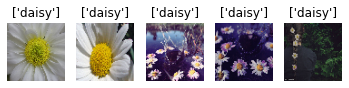

In [ ]:
# Print the dataset's size
print('dataset size: ', len(imported_flowers))
# Print the size of each set and plot 5 training images and their corresponding masks
slots = 0
for im in imported_flowers:
    plt.subplot(1, 5, slots+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.title(labels[slots])
    slots += 1
    if slots == 5: 
      break

In [ ]:
# And finally normalize the datasets. All value should be between -1.0 and 1.0.
imported_flowers_norm = ( imported_flowers / 255 )
print('Scale of the dataset samples:', (np.min(imported_flowers_norm), np.max(imported_flowers_norm)))

Scale of the dataset samples: (0.0, 1.0)


## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.

The IDG you constructed passes batches of transformed images to the neural network. The task of the network is to learn underlying features of the Homer images. The pipeline is as follows:

input image ---> pass to network ---> network encodes features (learning) ---> network decodes features (reconstruct image) ---> output image ---> compare with input (loss)

To make it work properly, the input images on both ends have to be augmented (transformed) the same way, that is why you should make an input and an output generator and zip it together.


In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images.

In [ ]:
# Creating 2 image generators, one for the input, one for the output
input_datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

output_datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False, 
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    zoom_range=0.2, 
    horizontal_flip=True)

# Fitting the image generators to the normalized training data
input_datagen.fit(x_train_norm)
output_datagen.fit(x_train_norm)

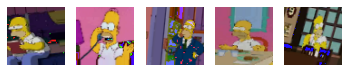

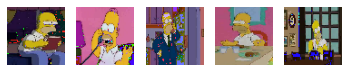

In [ ]:
#Plotting some augmented image examples
x_aug = next(input_datagen.flow(x_train_norm, batch_size=128, shuffle=False))

# Augmented
plt.figure()
for ind in range(5):
  plt.subplot(1, 5, ind+1)
  plt.imshow(cv2.cvtColor(((x_aug[ind]+1)*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.axis('off')

# Original
plt.figure()
for ind in range(5):
  plt.subplot(1, 5, ind+1)
  plt.imshow(cv2.cvtColor(((x_train_norm[ind]+1)*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.axis('off')

## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [ ]:
# Defining the model
def ae_model(input_size=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=(64,64,3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Reshape((256, 64)))
    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Reshape((16, 16, 256)))
    model.add(Conv2DTranspose(64, (3, 3), padding='same', activation="relu", strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(Conv2DTranspose(32, (3, 3), padding='same', activation="relu", strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
    model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
    model.add(Conv2D(3, (3, 3), padding='same', activation="relu"))
    return model

model = ae_model(input_size=(64, 64, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

In [ ]:
model.compile(optimizer='adam', # The optimisation method
              loss='mae', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['mse']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified

In [ ]:
# Zipping together the input and output generators
batch_size = 128
input_generator = input_datagen.flow(x_train_norm, batch_size=batch_size, shuffle=True, seed = 0)
output_generator = output_datagen.flow(x_train_norm, batch_size=batch_size, shuffle=True, seed = 0)
train_generator = zip(input_generator, output_generator)

In [ ]:
# Training the model
history = model.fit(train_generator, epochs=200, steps_per_epoch=len(x_train_norm) // batch_size, validation_data = (x_val_norm, x_val_norm))

Epoch 1/200
10/10 [==============================] - 4s 352ms/step - loss: 0.3168 - mse: 0.1511 - val_loss: 0.2426 - val_mse: 0.0870
Epoch 2/200
10/10 [==============================] - 3s 308ms/step - loss: 0.1865 - mse: 0.0535 - val_loss: 0.1906 - val_mse: 0.0592
Epoch 3/200
10/10 [==============================] - 3s 314ms/step - loss: 0.1644 - mse: 0.0422 - val_loss: 0.1651 - val_mse: 0.0418
Epoch 4/200
10/10 [==============================] - 3s 315ms/step - loss: 0.1463 - mse: 0.0352 - val_loss: 0.1484 - val_mse: 0.0370
Epoch 5/200
10/10 [==============================] - 3s 307ms/step - loss: 0.1358 - mse: 0.0309 - val_loss: 0.1407 - val_mse: 0.0335
Epoch 6/200
10/10 [==============================] - 3s 310ms/step - loss: 0.1303 - mse: 0.0293 - val_loss: 0.1359 - val_mse: 0.0326
Epoch 7/200
10/10 [==============================] - 3s 311ms/step - loss: 0.1258 - mse: 0.0281 - val_loss: 0.1371 - val_mse: 0.0325
Epoch 8/200
10/10 [==============================] - 3s 323ms/step - 

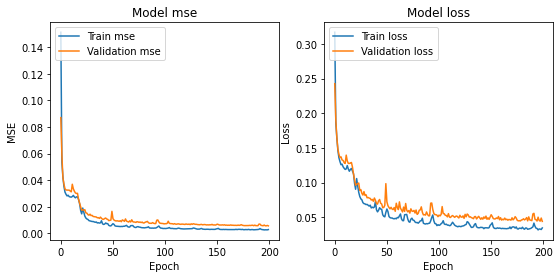

In [ ]:
# Plot training & validation mse values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train mse', 'Validation mse'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test set
loss, acc = model.evaluate(x_test_norm, x_test_norm)

print('Test loss: {}'.format(loss))

15/15 [==============================] - 0s 12ms/step - loss: 0.0435 - mse: 0.0055
Test loss: 0.04346781596541405


In [ ]:
# Calculate the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: <thrs> = <mean> + 0.5*<std>
validation_losses = []
for image in x_val_norm:
    image = np.expand_dims(image, axis=0)
    results = model.evaluate(image, image, verbose=0)
    validation_losses.append(results[0])

thrs = np.mean(validation_losses) + 0.5 * np.std(validation_losses)
print (thrs)

0.050304669337070826


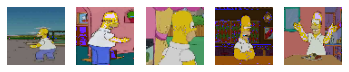

<Figure size 432x288 with 0 Axes>

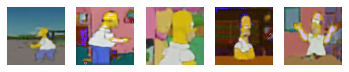

In [ ]:
# Plotting some test examples with the predictions
test_in = x_test_norm
test_out = model.predict(test_in)

plt.figure()
for ind in range(5):
  plt.subplot(1, 5, ind+1)
  plt.imshow(cv2.cvtColor(((test_in[ind]+1)*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.axis('off')
plt.show(); plt.clf()

plt.figure()
for ind in range(5):
  plt.subplot(1, 5, ind+1)
  plt.imshow(cv2.cvtColor(((test_out[ind]+1)*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.axis('off')

In [ ]:
# Evaluate the classification performance on the test set.
correct_predictions = 0
test_in = x_test_norm
test_out = model.predict(test_in)
mae = tf.keras.losses.MeanAbsoluteError()
for i in range (0, len(test_in)): 
  mae_val = mae(test_out[i], test_in[i]).numpy()
  if mae_val < thrs:
    correct_predictions += 1

accuracy = correct_predictions / len(test_in)
print(accuracy)

0.7666666666666667


In [ ]:
# And finally evaluate the classification performance on the Flowers dataset.
correct_predictions = 0
test_in = imported_flowers_norm
test_out = model.predict(test_in)
mae = tf.keras.losses.MeanAbsoluteError()
for i in range (0, len(test_in)): 
  mae_val = mae(test_out[i], test_in[i]).numpy()
  if mae_val < thrs:
    correct_predictions += 1

accuracy = correct_predictions / len(test_in)
print(1-accuracy)

0.5611843627110802
